Применение и последующее сравнение различных методов машинного обучения в задаче предсказания температуры плавления халькогенидных стекол в зависимости от их элементного состава

In [171]:
# Объявляю нужные библиотеки
import pandas as pd # Библиотека для работы с фреймворками
import numpy as np # Библиотека для математических операций
import matplotlib.pyplot as plt # Библиотека для визуализации данных
from sklearn.model_selection import train_test_split # Загрузка функции, разделяющей набор данных на тренировочную и тестовую выборки

Работа с исходными данными, взятыми из научной статьи *S. Singla et al. (2023)* [<u>https://doi.org/10.1088/2515-7639/acc6f2</u> ; <u>https://github.com/M3RG-IITD/chgs-ai</u>]. В качестве объекта выступает температура плавления халькогенидных стекол. Признаками же является молярное содержание тех или иных атомов халькогенов.

In [172]:
# Загрузка датасета из csv-файла
df = pd.read_csv('TG.csv', sep=',')

In [173]:
# Информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9196 entries, 0 to 9195
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Al      9196 non-null   float64
 1   As      9196 non-null   float64
 2   B       9196 non-null   float64
 3   Ba      9196 non-null   float64
 4   Be      9196 non-null   float64
 5   Bi      9196 non-null   float64
 6   C       9196 non-null   float64
 7   Ca      9196 non-null   float64
 8   Cd      9196 non-null   float64
 9   Ce      9196 non-null   float64
 10  Co      9196 non-null   float64
 11  Cr      9196 non-null   float64
 12  Cu      9196 non-null   float64
 13  Dy      9196 non-null   float64
 14  Er      9196 non-null   float64
 15  Fe      9196 non-null   float64
 16  Ga      9196 non-null   float64
 17  Gd      9196 non-null   float64
 18  Ge      9196 non-null   float64
 19  Hf      9196 non-null   float64
 20  Hg      9196 non-null   float64
 21  Ho      9196 non-null   float64
 22  

In [174]:
# Описание датасета
df.describe()

,Al,As,B,Ba,Be,Bi,C,Ca,Cd,Ce,...,Ta,Tb,Te,Ti,Tl,W,Y,Zn,Zr,TG
count,9196.000000,9196.000000,9196.000000,9196.000000,9196.000000,9196.000000,9196.000000,9196.000000,9196.000000,9196.000000,...,9196.000000,9196.000000,9196.000000,9196.000000,9196.00000,9196.000000,9196.000000,9196.000000,9196.000000,9196.000000
mean,1.098942,9.583973,0.819990,0.497241,0.121576,0.359686,0.097475,0.309006,0.384221,0.210965,...,0.069090,0.046489,10.677454,0.631923,1.49454,0.014181,0.115392,0.173218,1.425075,515.393433
std,6.690844,15.529090,4.266717,3.111895,1.731360,2.984402,1.051356,3.319451,3.557683,3.549566,...,1.405746,1.242360,21.932232,4.624814,6.05377,0.324932,1.358125,1.657416,8.083286,143.706802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,6.950000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,409.075000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,483.150000
75%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,606.378125
max,89.000000,85.000000,43.700000,38.800000,42.000000,60.000000,15.000000,75.000000,99.290000,70.000000,...,55.000000,55.000000,100.000000,66.000000,81.50000,18.000000,60.000000,40.000000,70.000000,1202.000000


/tmp/ipykernel_13158/2687086399.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  h.set_yticklabels(['{:,.0%}'.format(y) for y in y_ticks])


[Text(0, 0.0, '0%'),
 Text(0, 0.0005, '0%'),
 Text(0, 0.001, '0%'),
 Text(0, 0.0015, '0%'),
 Text(0, 0.002, '0%'),
 Text(0, 0.0025, '0%'),
 Text(0, 0.003, '0%'),
 Text(0, 0.0035, '0%')]

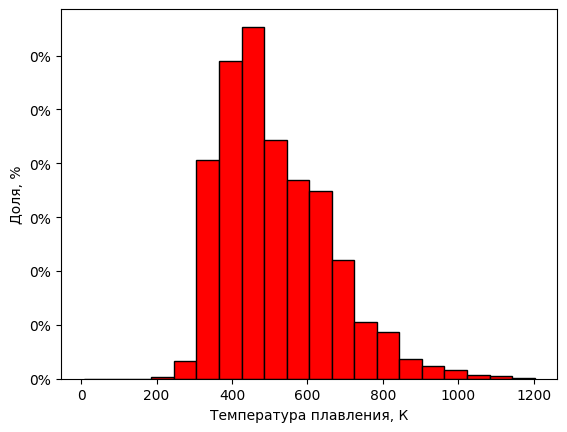

In [ ]:
# Гистограмма распределения температуры плавления халькогенидных стекол
h = df['TG'].hist(
    bins=20,
    density=True,
    color='red',
    edgecolor='black',
    grid=False
)

# Подписи к осям
plt.xlabel('Температура плавления, К')
plt.ylabel('Доля, отн.ед.')

In [176]:
# Выделение из датасета объектов и признаков
X_data = df.iloc[:,:-1].to_numpy() # Выделение признаков в отдельный
Y_data = df['TG'].to_numpy() # Выделение объектов в отдельный массив

In [177]:
# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3, shuffle=True, random_state=18) # Разделение происходит случайным образом